# Supermarket Sales Prediction

### Importing Libraries

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tabulate import tabulate
warnings.simplefilter('ignore')

### Data Preprocesing

In [103]:
df = pd.read_csv(r'C:/Users/PC/Desktop/ML/Data/supermarket_sales.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df.head(5)

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_id       1000 non-null   object 
 1   branch           1000 non-null   object 
 2   city             1000 non-null   object 
 3   customer_type    1000 non-null   object 
 4   gender_customer  1000 non-null   object 
 5   product_line     1000 non-null   object 
 6   unit_cost        1000 non-null   float64
 7   quantity         1000 non-null   int64  
 8   5pct_markup      1000 non-null   float64
 9   revenue          1000 non-null   float64
 10  date             1000 non-null   object 
 11  time             1000 non-null   object 
 12  payment_method   1000 non-null   object 
 13  cogs             1000 non-null   float64
 14  gm_pct           1000 non-null   float64
 15  gross_income     1000 non-null   float64
 16  rating           1000 non-null   float64
dtypes: float64(7), 

In [5]:
df.describe()

,unit_cost,quantity,5pct_markup,revenue,cogs,gm_pct,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [6]:
df.median()

unit_cost        55.230000
quantity          5.000000
5pct_markup      12.088000
revenue         253.848000
cogs            241.760000
gm_pct            4.761905
gross_income     12.088000
rating            7.000000
dtype: float64

In [7]:
df.skew()

unit_cost       0.007077
quantity        0.012941
5pct_markup     0.892570
revenue         0.892570
cogs            0.892570
gm_pct          0.000000
gross_income    0.892570
rating          0.009010
dtype: float64

In [8]:
df.isnull().sum()

invoice_id         0
branch             0
city               0
customer_type      0
gender_customer    0
product_line       0
unit_cost          0
quantity           0
5pct_markup        0
revenue            0
date               0
time               0
payment_method     0
cogs               0
gm_pct             0
gross_income       0
rating             0
dtype: int64

In [9]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender_customer',
       'product_line', 'unit_cost', 'quantity', '5pct_markup', 'revenue',
       'date', 'time', 'payment_method', 'cogs', 'gm_pct', 'gross_income',
       'rating'],
      dtype='object')

In [10]:
df.shape

(1000, 17)

### Exploratory Data Analysis

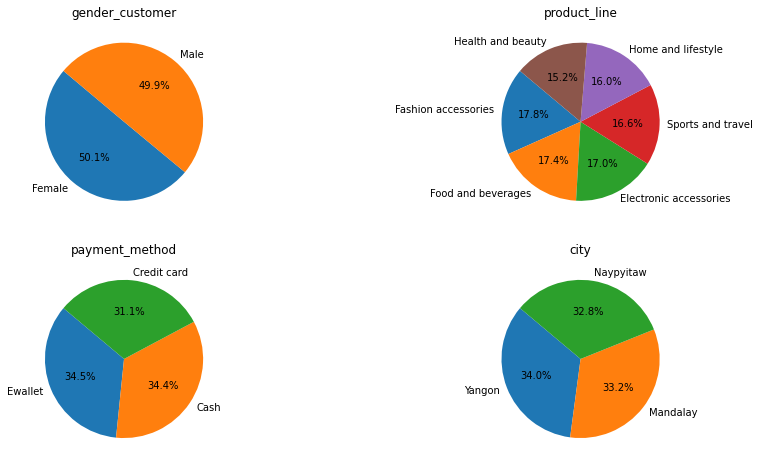

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

ax[0,0].pie(df['gender_customer'].value_counts(), labels=df['gender_customer'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0,0].set_title('gender_customer')

ax[0,1].pie(df['product_line'].value_counts(), labels=df['product_line'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0,1].set_title('product_line')

ax[1,0].pie(df['payment_method'].value_counts(), labels=df['payment_method'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1,0].set_title('payment_method')

ax[1,1].pie(df['city'].value_counts(), labels=df['city'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1,1].set_title('city')

plt.show()

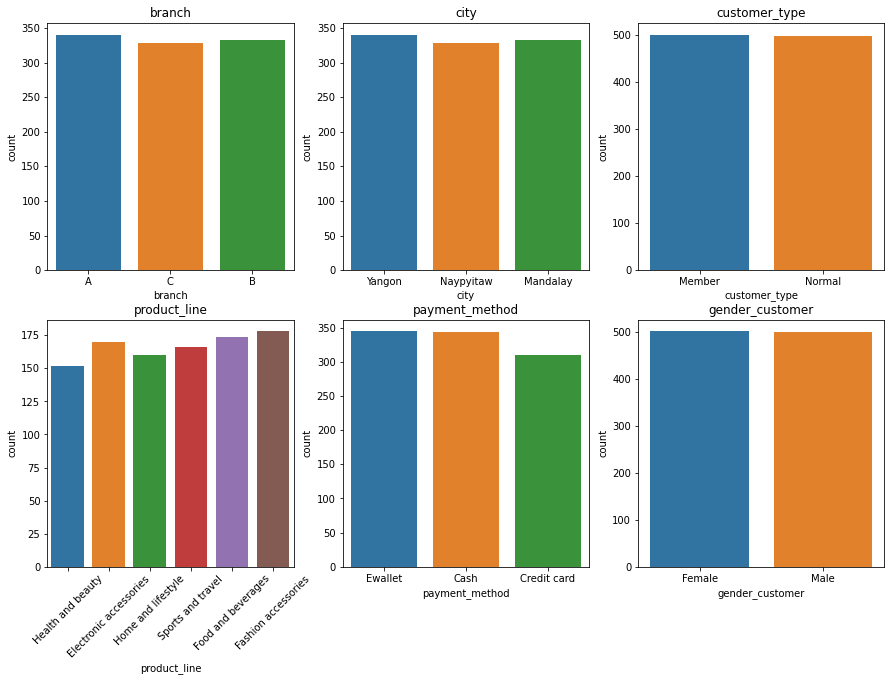

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(data = df , x = 'branch',ax = ax[0,0])
sns.countplot(data = df , x = 'city',ax = ax[0,1])
sns.countplot(data = df , x = 'customer_type',ax = ax[0,2])
sns.countplot(data = df , x = 'product_line',ax = ax[1,0])
sns.countplot(data = df , x = 'payment_method',ax = ax[1,1])
sns.countplot(data = df , x = 'gender_customer',ax = ax[1,2])

ax[0, 0].set_title('branch')
ax[0, 1].set_title('city')
ax[0, 2].set_title('customer_type')
ax[1, 0].set_title('product_line')
ax[1, 1].set_title('payment_method')
ax[1, 2].set_title('gender_customer')

ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)

plt.show()

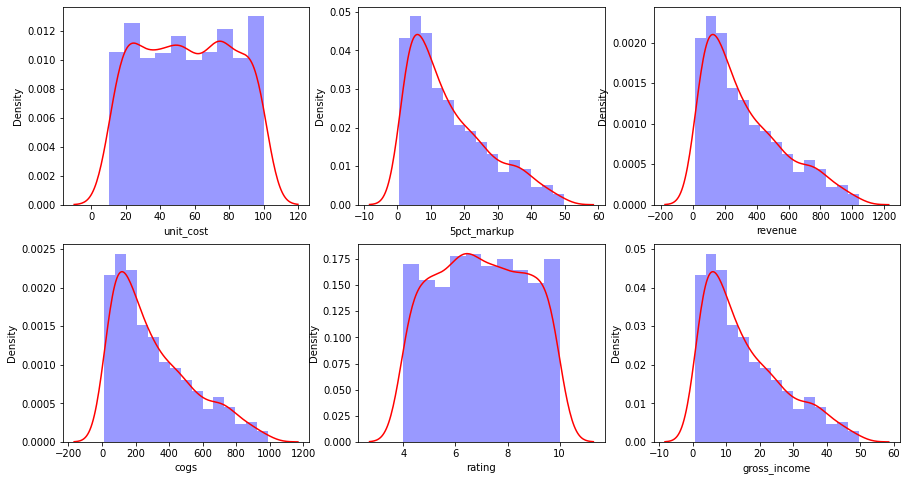

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

sns.distplot(df['unit_cost'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['5pct_markup'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['revenue'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['cogs'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['rating'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['gross_income'],ax=ax[1,2],  color = 'red', hist_kws={'color': 'blue'})

plt.show()

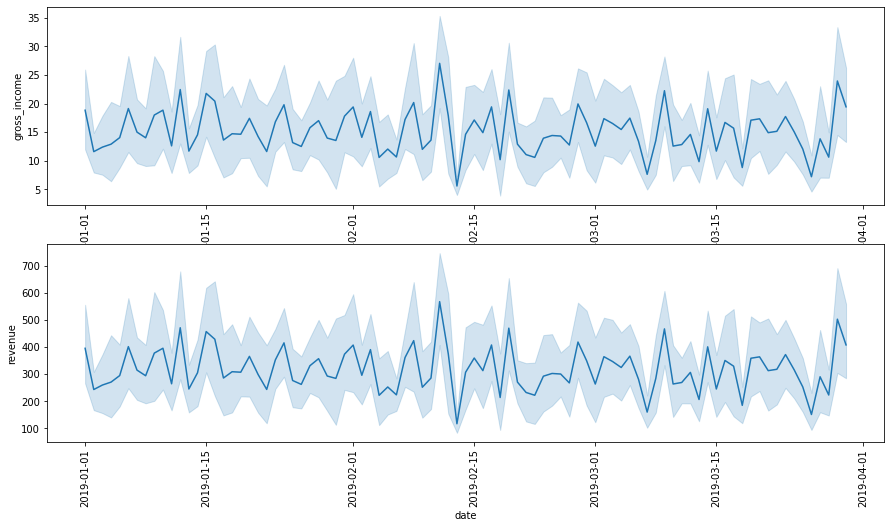

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8))

sns.lineplot(data=df, x='date', y='gross_income', ax=ax[0])
sns.lineplot(data=df, x='date', y='revenue', ax=ax[1])
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)

plt.show()

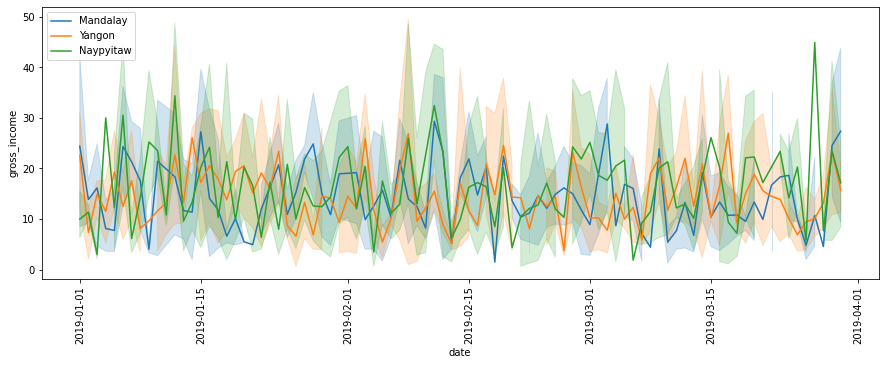

In [46]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='date', y='gross_income', hue='city')
plt.tick_params(axis='x', rotation=90)

plt.legend()
plt.show()

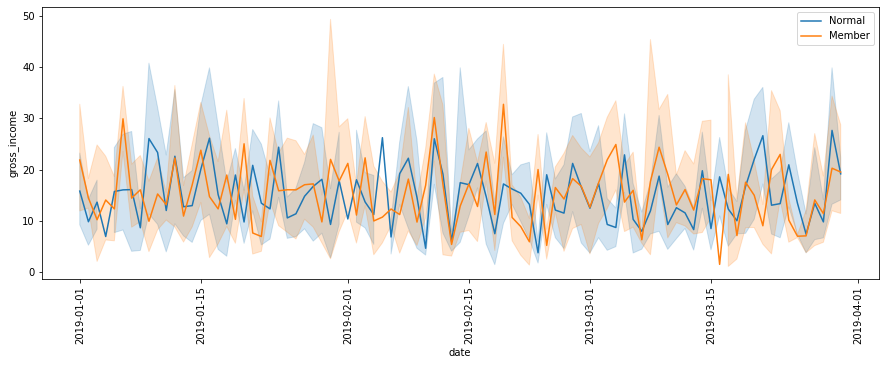

In [47]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='date', y='gross_income', hue='customer_type')
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.show()

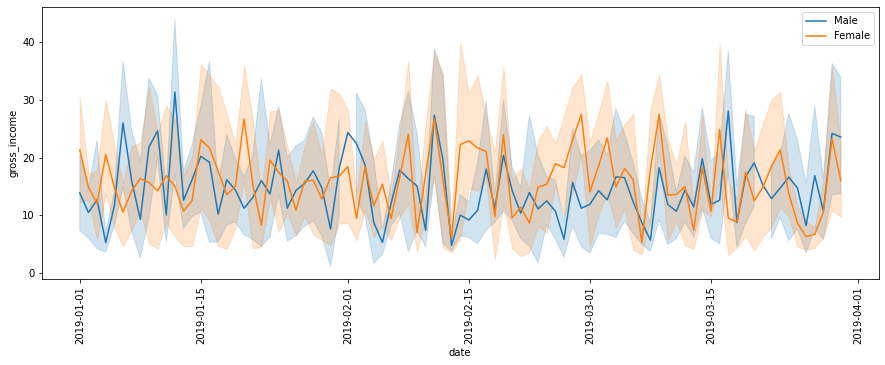

In [48]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='date', y='gross_income', hue='gender_customer')
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.show()

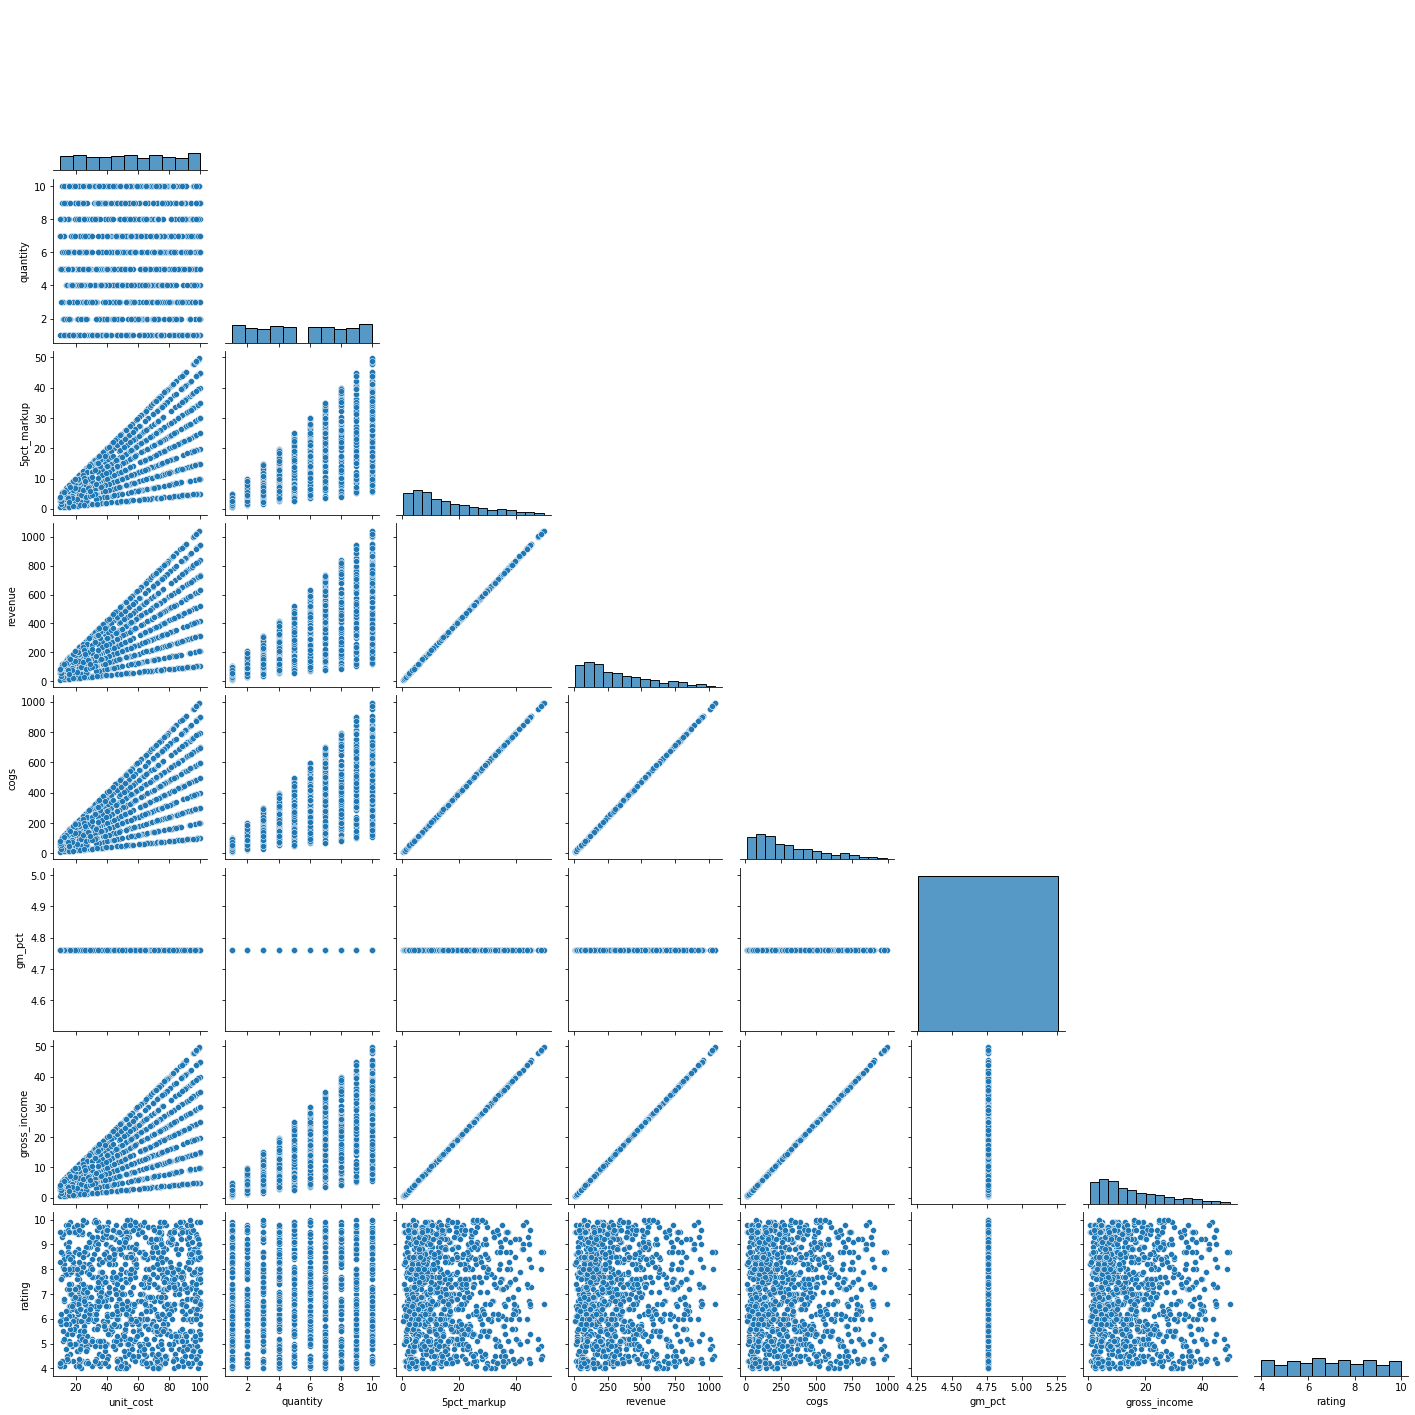

In [104]:
sns.pairplot(df, corner=True)
plt.show()

### Modeling and Evaluation

In [49]:
df.set_index('date', inplace=True)

###  ARIMA Model

<Figure size 1080x1440 with 0 Axes>

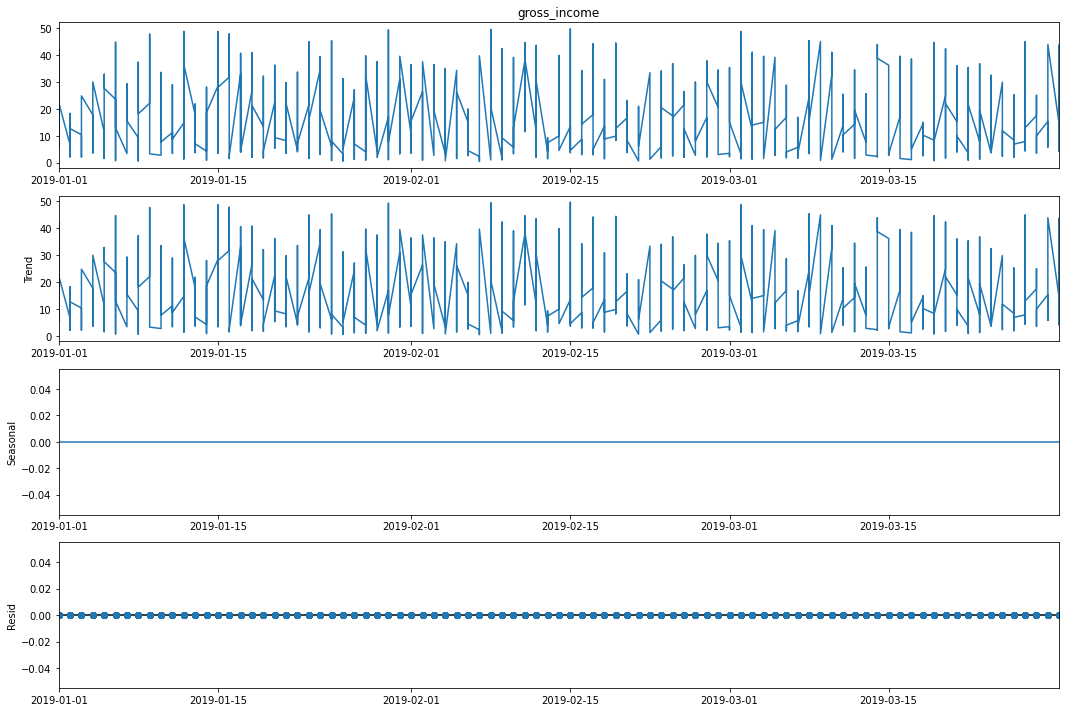

In [50]:
descompose = seasonal_decompose(df['gross_income'], model='additive', period=1)
plt.rcParams['figure.figsize'] = (15, 10)
plt.figure(figsize=(15, 20))
descompose.plot()
plt.show()

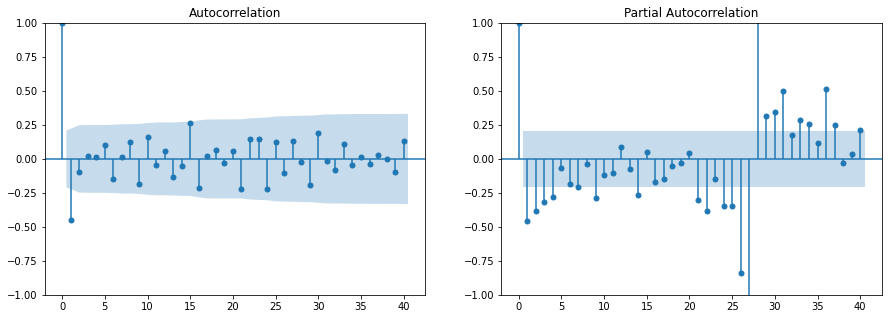

In [51]:
df_g1 = df.groupby(['date'])['gross_income'].sum()

df_diff = df_g1.diff().dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(df_diff, lags=40, ax=ax[0])
plot_pacf(df_diff, lags=40, ax=ax[1])

plt.show()

In [76]:
model = ARIMA(df_g1,  order=(2, 1, 1))
results = model.fit()

summary_table_atend = results.summary()
summary_table_atend

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           gross_income   No. Observations:                   89
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -503.508
Date:                Fri, 13 Oct 2023   AIC                           1015.016
Time:                        20:03:34   BIC                           1024.925
Sample:                    01-01-2019   HQIC                          1019.008
                         - 03-30-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0468      0.125     -0.373      0.709      -0.293       0.199
ar.L2         -0.1327      0.121     -1.099      0.272      -0.370       0.104
ma.L1         -0.9995      3.492     -0.286      0.775      -7.844       5.845
sigma2      5172.8571   1.79e+04      0.290      0.772   -2.98e+04    4.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.00
Prob(Q):                              0.95   Prob(JB):                         0.14
Heteroskedasticity (H):               1.53   Skew:                             0.39
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

╒═══════╤════════════╕
│       │     Resids │
╞═══════╪════════════╡
│ count │   89       │
├───────┼────────────┤
│ mean  │    3.74482 │
├───────┼────────────┤
│ std   │   78.2858  │
├───────┼────────────┤
│ min   │ -137.477   │
├───────┼────────────┤
│ 25%   │  -55.7461  │
├───────┼────────────┤
│ 50%   │  -15.8675  │
├───────┼────────────┤
│ 75%   │   56.493   │
├───────┼────────────┤
│ max   │  225.961   │
╘═══════╧════════════╛


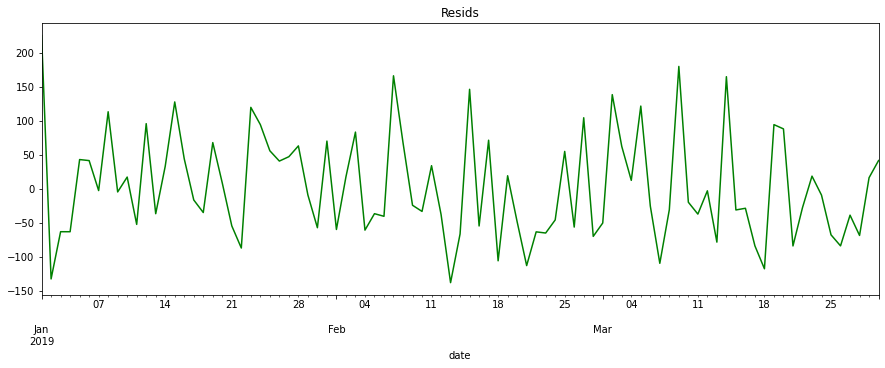

In [58]:
results.resid.plot( color='green', title="Resids", figsize = (15,5))

resid_summary_atend_df = pd.DataFrame(results.resid.describe(), columns=['Resids'])

print(tabulate(resid_summary_atend_df, headers='keys', tablefmt='fancy_grid'))

In [97]:
n_pasos = 10
modeler = ARIMA(df_g1, order=(2, 2, 1))
results = modeler.fit()
forecast = results.forecast(steps=n_pasos)

start_date = df_g1.index[0]
end_date = df_g1.index[-1]
prediccion = results.predict(start=start_date, end=end_date)

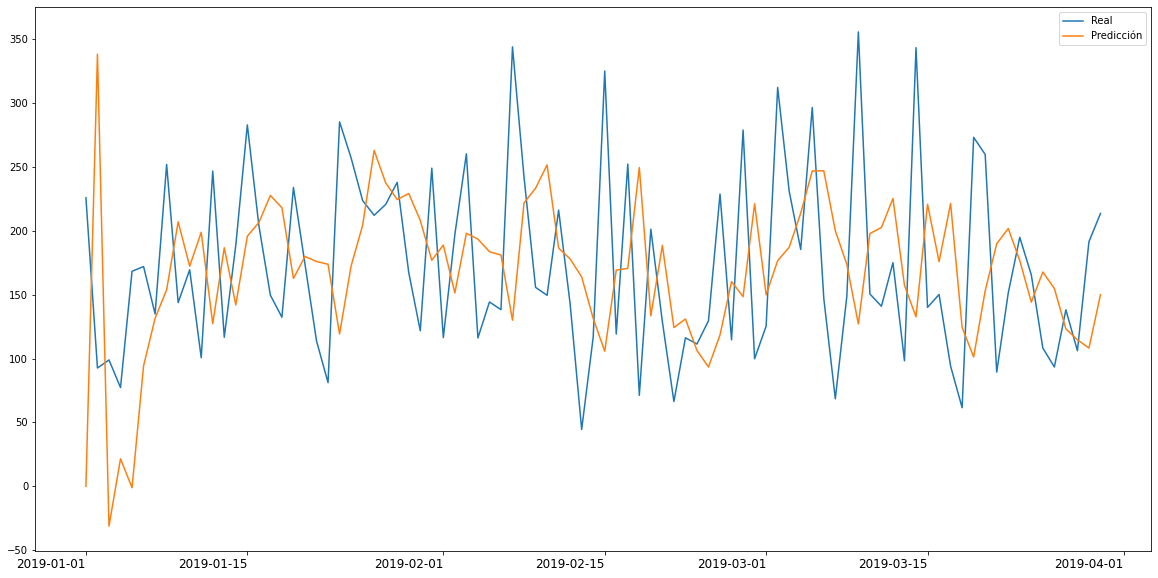

In [98]:
plt.figure(figsize=(20, 10))

plt.plot(df_g1, label='Real')
sns.lineplot(prediccion.index, prediccion.values, label='Predicción')

plt.legend()
plt.xticks(ha='right', fontsize=12)
plt.show()

In [99]:
y_true = df_g1.tail(n_pasos)

mse = mean_squared_error(y_true, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, forecast)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 3366.8010603660996
RMSE: 58.02414204765202
MAE: 47.102488496983746
